<a href="https://colab.research.google.com/github/GabrielaRomoM/EjerciciosSYS-Python/blob/main/1INTRODUCCIONSYS/Se%C3%B1alesEnergia_Potencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Energía y Potencia

Ejercicio 1

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

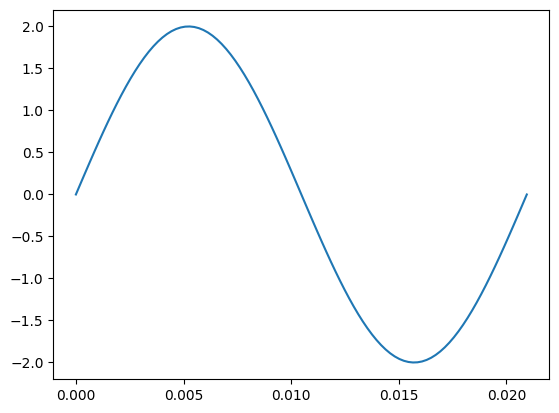

In [ ]:
w = 300
L = 0.01
R = 4
Imax = 2
T0 = 2*np.pi/w
N = 100

t = np.linspace(0, T0, N)
i = Imax*np.sin(w*t)
plt.plot(t,i)

In [ ]:
Vmax = np.sqrt((R**2)+((w*L)**2))*Imax
ang = np.arctan(w*L/R)

v = Vmax*np.sin(w*t + ang)

Text(0, 0.5, 'Amplitud')

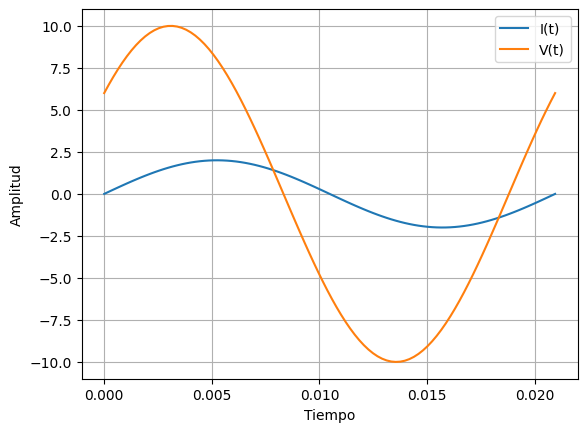

In [ ]:
plt.plot(t, i, label='I(t)')
plt.plot(t, v, label='V(t)')
plt.grid()
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

Text(0, 0.5, 'Amplitud')

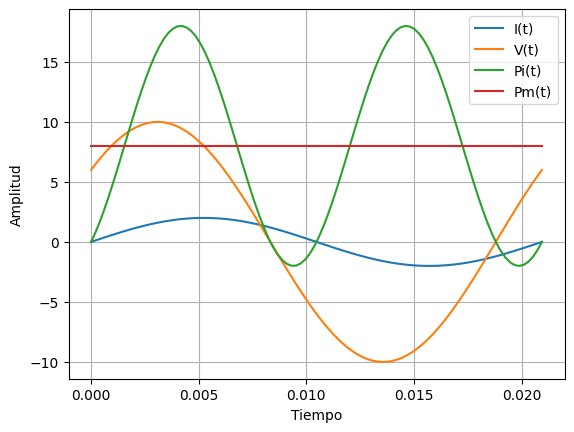

In [ ]:
pi = v*i
pm = np.trapz(pi, t)/T0

plt.plot(t, i, label='I(t)')
plt.plot(t, v, label='V(t)')
plt.plot(t, pi, label='Pi(t)')
plt.plot(t, pm*np.ones(len(t)), label='Pm(t)')
plt.grid()
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

In [ ]:
C = 0.01
Vmax = np.sqrt((R**2)+(1/((w*C)**2)))*Imax
ang = -np.arctan(1/(w*C*R))

v = Vmax*np.sin(w*t + ang)

Text(0, 0.5, 'Amplitud')

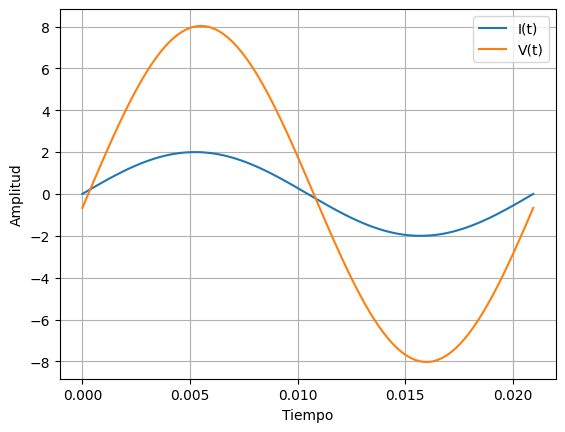

In [ ]:
plt.plot(t, i, label='I(t)')
plt.plot(t, v, label='V(t)')
plt.grid()
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

Text(0, 0.5, 'Amplitud')

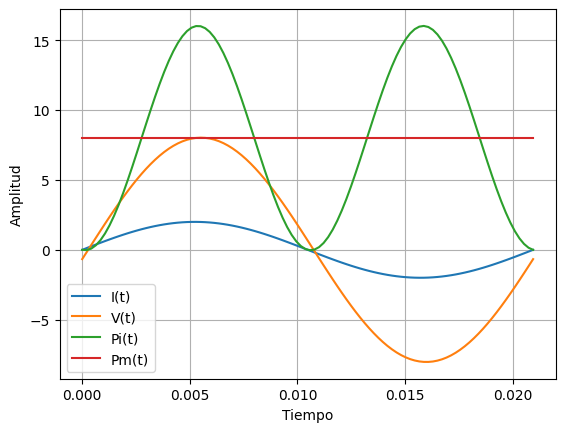

In [ ]:
pi = v*i
pm = np.trapz(pi, t)/T0

plt.plot(t, i, label='I(t)')
plt.plot(t, v, label='V(t)')
plt.plot(t, pi, label='Pi(t)')
plt.plot(t, pm*np.ones(len(t)), label='Pm(t)')
plt.grid()
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

  EJERCICIO 2
  
  Discuta el concepto de valor RMS de una señal a partir de su potencia med

 Igualando el valor de la potencia de un elemento resistivo y la potencia media de la señal de corriente en un periodo de tiempo obtenemos que la corriente de esa señal/circuito corresponde a la raiz cuadrada de la potencia media. Realizando el respectivo calculo obtenemos
 $$ \frac{I_{\max}}{\sqrt{2}} $$

 que equivale a la formula ya conocida para calcular el valor eficaz o RMS. Por lo tanto podemos decir que la potencia media es la que "define" el valor RMS de una señal

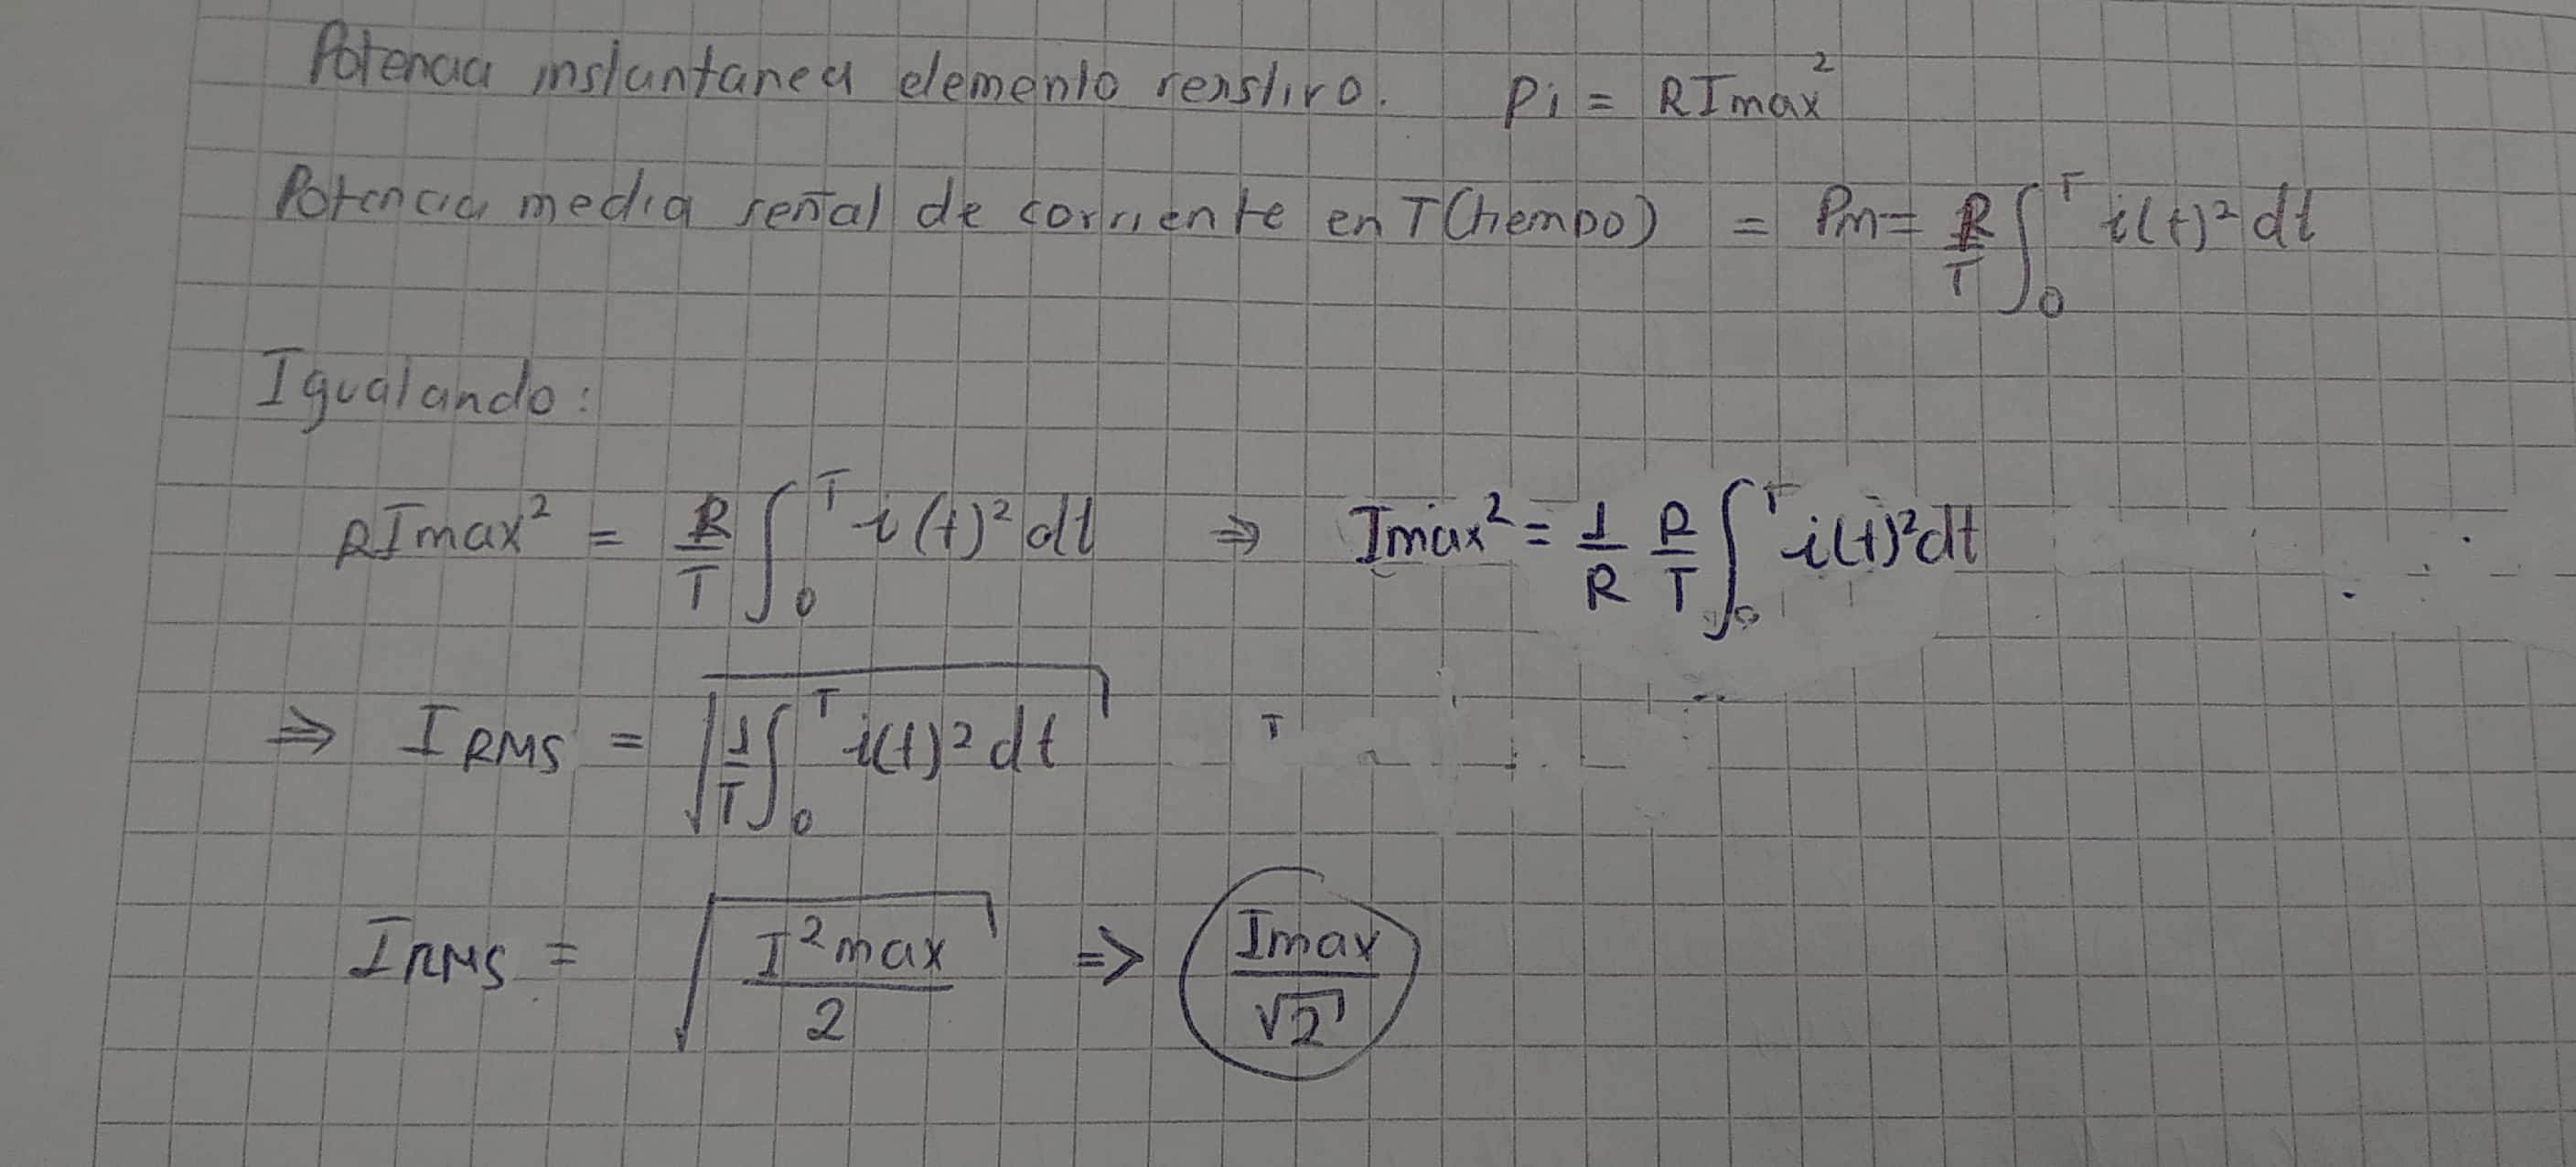




  

EJERCICIO 3

In [ ]:
from sympy import *
t = symbols('t', Real = True)
a = symbols('a', Real = True, nonzero = True, nonnegative = True)
T = symbols('T', Real = True)
x = exp(-a*t)*t
ex= x**2
ex
E = integrate(ex, (t,-T/2,T/2))
print('La energía total de la señal es:')
E

La energía total de la señal es:


(-T**2*a**2/2 - T*a - 1)*exp(-T*a)/(4*a**3) - (-T**2*a**2/2 + T*a - 1)*exp(T*a)/(4*a**3)

In [ ]:
Ex = limit(integrate(ex, (t, -T/2, T/2)), T, oo)
print('\nLa Energia de la señal es:')
Ex


La Energia de la señal es:


oo

In [ ]:
P = limit(integrate(ex, (t, -T/2, T/2)) / T, T, oo)
print('\nLa potencia media de la señal es:')
P


La potencia media de la señal es:


oo

Comprobación resultado por integral por partes

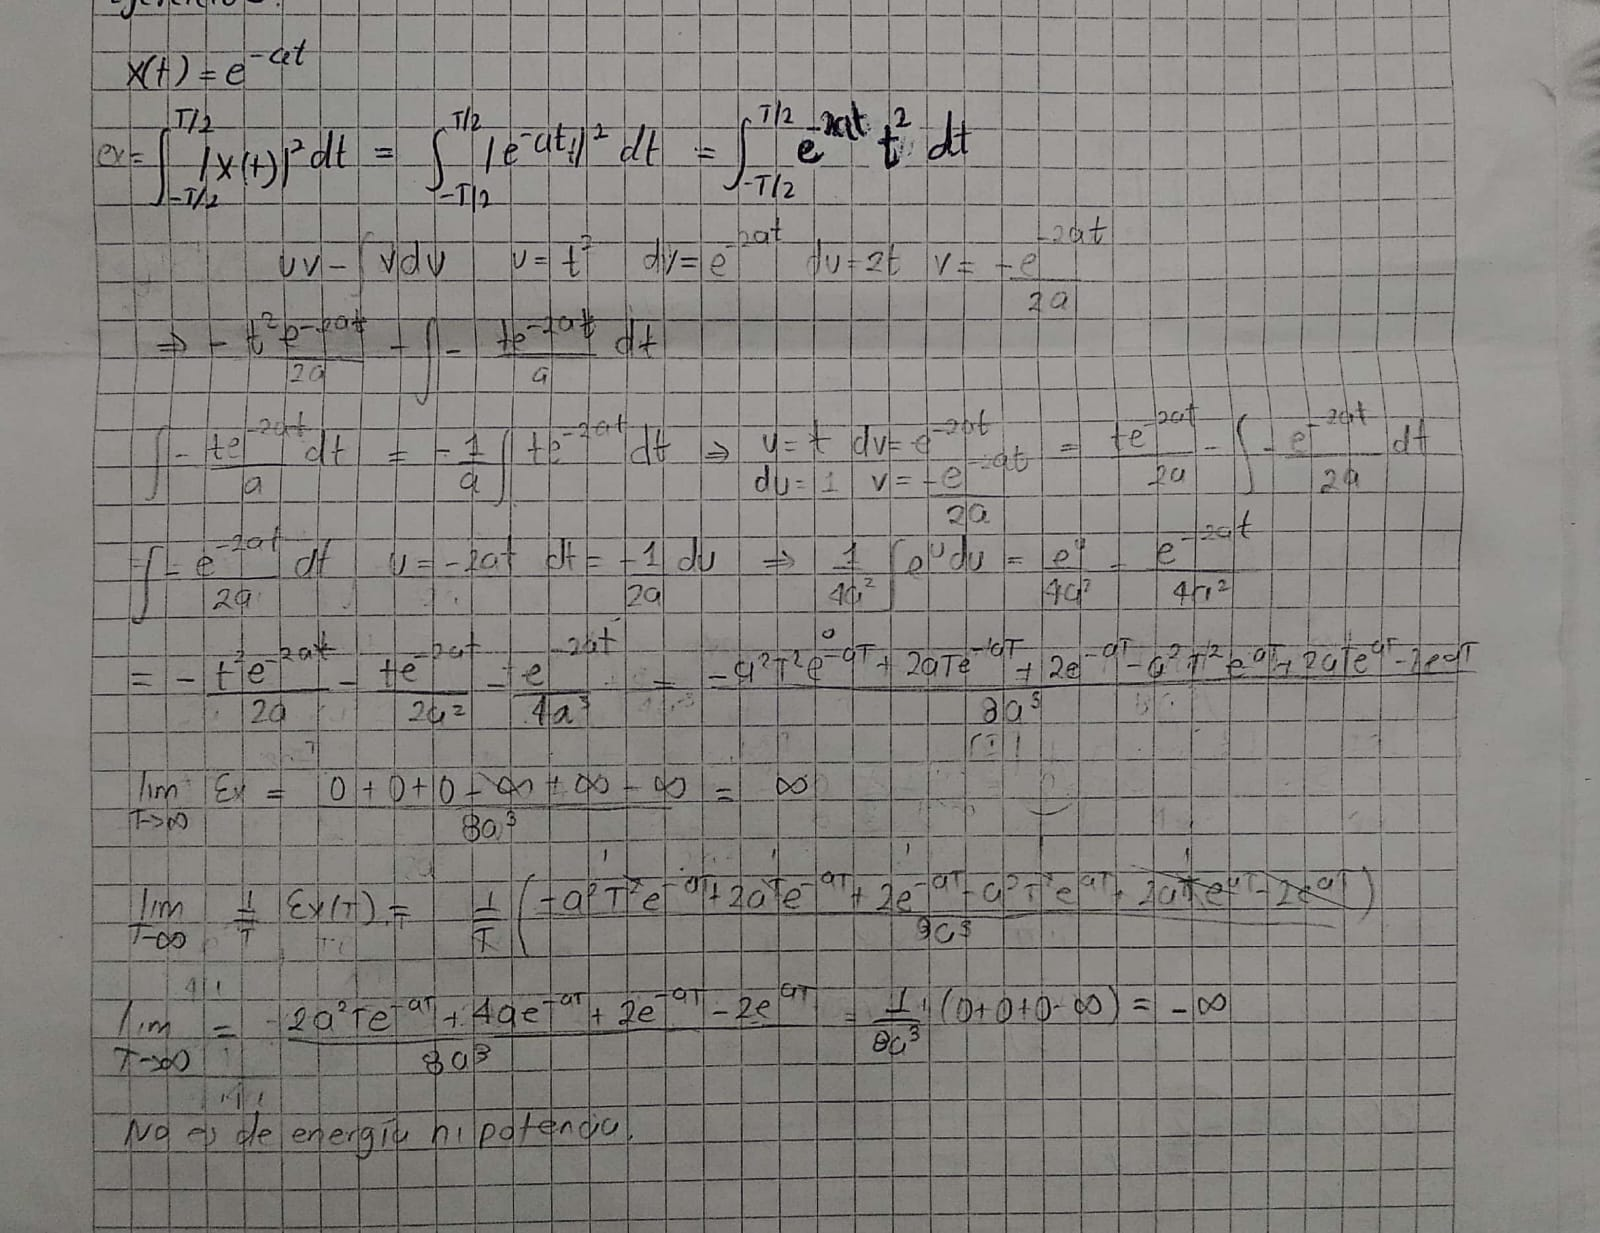


La señal no es de energía ni de potencia.

EJERCICIO 4

In [ ]:
# Definir símbolos y señales
t, B, T =symbols("t B T ", Real=True)

parte1 = (1, (0 <= t) & (t <= T/4))
parte2 = (-1, (T/4 < t) & (t <= (3*T)/4))
parte3 = (1, ((3*T)/4 < t) & (t <= T))

x2 = sym.Piecewise(parte1, parte2, parte3)
Wo = 2*sym.pi/T
x1 = sym.cos(Wo*t)

In [ ]:
x1

cos(2*pi*t/T)

In [ ]:
x2

Piecewise((1, (t >= 0) & (t <= T/4)), (-1, (t <= 3*T/4) & (t > T/4)), (1, (T >= t) & (t > 3*T/4)))

In [ ]:
A = 1
x2 = A*(sym.Heaviside(t) - sym.Heaviside(t-T/4)) -  A*(sym.Heaviside(t-T/4) - sym.Heaviside(t-3*T/4)) +  A*(sym.Heaviside(t-3*T/4) - sym.Heaviside(t-T))
x2

Heaviside(t) - Heaviside(-T + t) + 2*Heaviside(-3*T/4 + t) - 2*Heaviside(-T/4 + t)

In [ ]:
#integrando las tres partes principales con sympy
P1 = (1/T)*sym.integrate(x1**2, (t, 0, T))
P3 = (1/T)*sym.integrate(A**2, (t, 0, T))
P2 = -(2/T)*(sym.integrate(x1*A, (t, 0, T/4))-sym.integrate(x1*A, (t, T/4,3*T/4))+sym.integrate(x1*A, (t, 3*T/4,T)))
Pd = P1 + P2 + P3
Pd

1 - 2*(-Piecewise((-T/pi, (T > -oo) & (T < oo) & Ne(T, 0)), (T/2, True)) + 2*Piecewise((T/(2*pi), (T > -oo) & (T < oo) & Ne(T, 0)), (T/4, True)))/T + Piecewise((T/2, (T > -oo) & (T < oo) & Ne(T, 0)), (T, True))/T

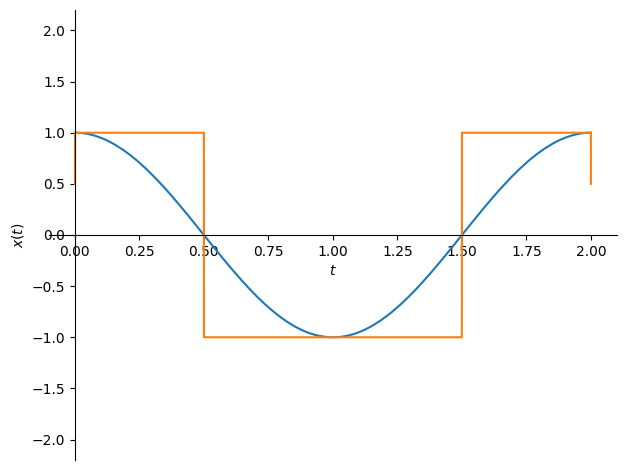

In [ ]:
#graficar señales con A, B y T predefinidos
p1 = sym.plot(x1.subs({B:1,T:2}), (t, 0, 2), ylim=[-2.2, 2.2], ylabel=r'$x(t)$', xlabel = '$t$', show=False);
p2 = sym.plot(x2.subs({A:1,T:2}), (t, 0, 2), ylim=[-2.2, 2.2], ylabel=r'$x(t)$',show=False);

p1.extend(p2)#se extiende los gráficos sobre una misma figura
p1.show()

EJERCICIO 5

La demostración se basa en el hecho de que ambas medidas utilizan el mismo proceso: elevar la señal al cuadrado y luego integrarla en el tiempo.

Elevando x(t) al cuadrado, obtenemos el mismo resultado que con el complejo conjugado ya que el complejo conjugado de una señal real es igual a la señal original.

Tanto la norma al cuadrado de una señal como su energía calculan el mismo valor porque ambas expresiones representan la cantidad de "energía" o "amplitud" en la señal al elevarla al cuadrado y luego integrarla en el tiempo. Por lo tanto, la norma al cuadrado de una señal es igual a su energía.
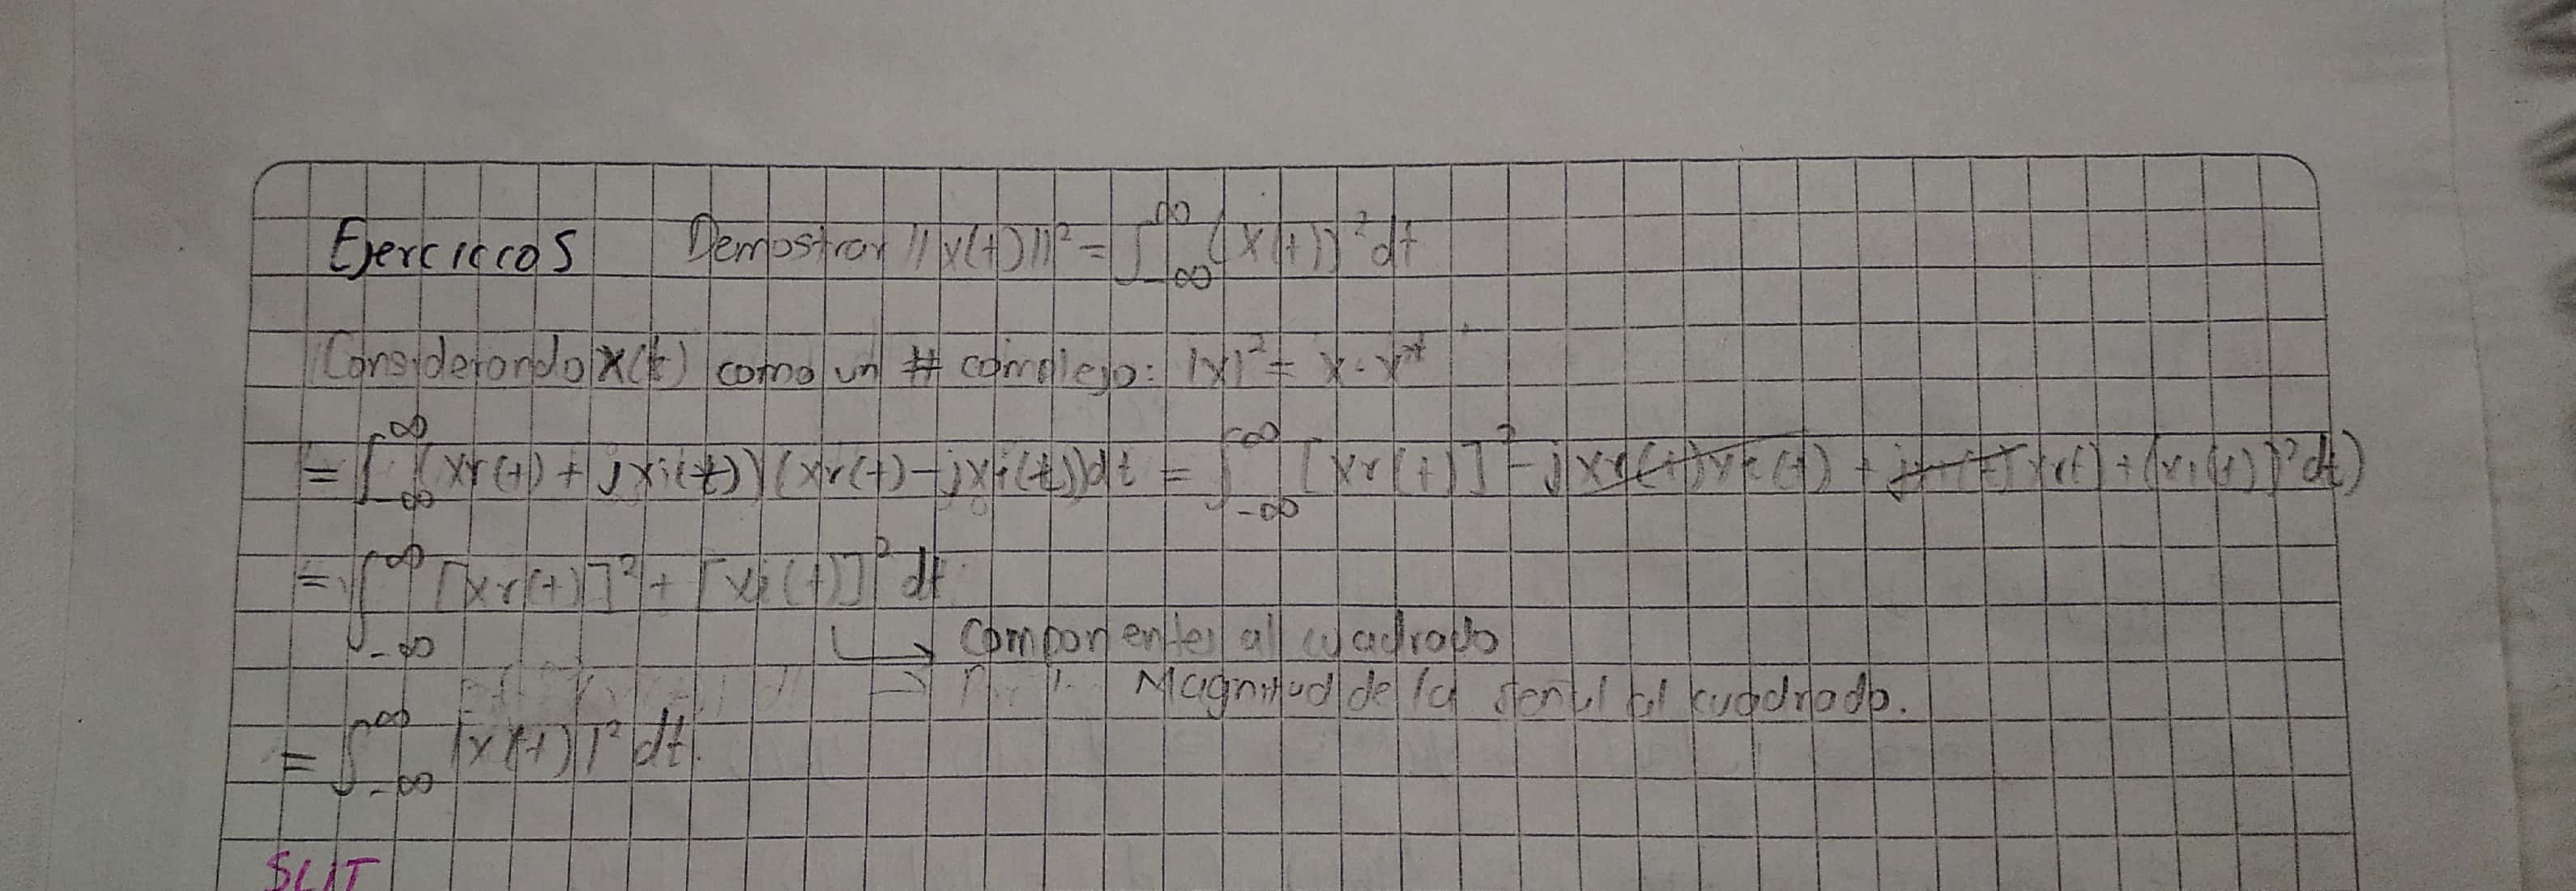


